In [19]:
import xarray as xr
import matplotlib.pyplot as plt

In [7]:
les = xr.open_dataset('/glade/derecho/scratch/jsauer/ForPeople/ForCAMS/SET_10_12_23/DC/DC_Ug15_src_9_10kg_hour_01.4')
les

<xarray.Dataset>
Dimensions:                (time: 361, srcDim: 1, locDim: 3, kDim: 15,
                            jDim: 30, iDim: 30, timeDim: 361)
Coordinates:
  * time                   (time) float32 3.6e+03 3.605e+03 ... 5.4e+03
Dimensions without coordinates: srcDim, locDim, kDim, jDim, iDim, timeDim
Data variables:
    srcAuxScLocation       (srcDim, locDim) float64 ...
    srcAuxScMassSpecValue  (srcDim) float64 ...
    structureMask          (kDim, jDim, iDim) float64 ...
    xPos                   (kDim, jDim, iDim) float32 ...
    yPos                   (kDim, jDim, iDim) float32 ...
    zPos                   (kDim, jDim, iDim) float32 ...
    u                      (timeDim, kDim, jDim, iDim) float32 ...
    v                      (timeDim, kDim, jDim, iDim) float32 ...
    w                      (timeDim, kDim, jDim, iDim) float32 ...
    q_CH4                  (time, kDim, jDim, iDim) float32 ...

In [16]:
dss = xr.open_dataset('/glade/work/cbecker/SEALS_training_data/data_gen_20240319/training_data_DC_Ug15_src_9_10kg_hour_01.4.nc')
dss

<xarray.Dataset>
Dimensions:         (variable: 8, sample: 30, sensor: 10, time: 100, mask: 2,
                     pot_leak: 20, target_time: 1, sensor_loc: 3)
Coordinates:
  * variable        (variable) <U12 'ref_distance' 'ref_azi_sin' ... 'w' 'q_CH4'
  * sensor_loc      (sensor_loc) <U4 'xPos' 'yPos' 'zPos'
Dimensions without coordinates: sample, sensor, time, mask, pot_leak,
                                target_time
Data variables:
    encoder_input   (sample, sensor, time, variable, mask) float32 ...
    decoder_input   (sample, pot_leak, target_time, variable, mask) float32 ...
    target          (sample, pot_leak, target_time) int64 ...
    target_ch4      (sample, pot_leak, target_time) float32 ...
    sensor_meta     (sample, sensor, sensor_loc) float32 ...
    leak_meta       (sample, pot_leak, sensor_loc) float32 ...
    met_sensor_loc  (sample, sensor_loc) float32 ...
    leak_rate       (sample) float32 ...

In [49]:
dss['encoder_input'][idx, :, 1, :, -1].values

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0., -999.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.]],
      dtype=float32)

In [50]:
dss['decoder_input'][idx, :, 0, :, -1].values

array([[   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -

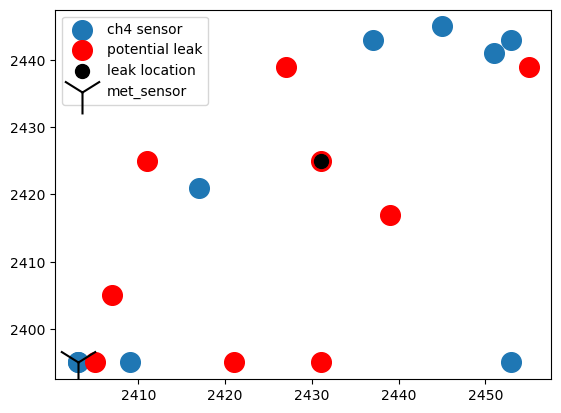

In [35]:
idx = 28

sensor_mask = dss['encoder_input'][idx, :, 0,  0, 1] > -1
pot_leak_mask = dss['decoder_input'][idx, :, 0,  0, 1] > -1
target_idx = dss['target'][idx].argmax()
x_sensor = dss['sensor_meta'][idx, :, 0].values[sensor_mask]
y_sensor = dss['sensor_meta'][idx, :, 1].values[sensor_mask]
x_leak = dss['leak_meta'][idx, :, 0].values[pot_leak_mask]
y_leak = dss['leak_meta'][idx, :, 1].values[pot_leak_mask]
x_met = dss['met_sensor_loc'][idx, 0]
y_met = dss['met_sensor_loc'][idx, 1]

plt.scatter(x_sensor, y_sensor, 200, label='ch4 sensor')
plt.scatter(x_leak, y_leak, 200, color='r', label='potential leak')
plt.scatter(x_leak[target_idx], y_leak[target_idx], s=100, color='k', label='leak location')
plt.scatter(x_met, y_met, 1000, marker="1", color='k', label='met_sensor')
plt.legend()

array([[   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [   0.,    0.,    0.,    0., -999., -999., -999.,    0.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -